# Time Series Forecasting

## <span style="color:cyan">Box Jenkins Method</span>

ARIMA model:
* **Auto Regression**: Regression of the desired variable against itself. In this case we are predicting energy generation values using a linear combination of past values of energy generation.
* **Integrated**: Differencing time series to obtain stationary data
* **Moving Average**: Uses past errors in forecasts in a regression-llike model

Dependencies:
* pandas
* numpy
* statsmodels
    * pip install statsmodels

# Data Prep

In [2]:
import numpy as np
import pandas as pd
import pickle
from datetime import datetime

In [55]:
df = pickle.load(open('assets/df.p', 'rb'))
df

,Biomass,Geothermal,HydroElectric,Thermal,Solar,Wind
Date,,,,,,
2016-12-27 00:00:00,105.04,178.45,0.41,104.51,3.06,0.49
2016-12-27 01:00:00,103.92,178.71,0.41,84.67,3.06,0.49
2016-12-27 02:00:00,103.38,177.92,0.40,73.57,3.06,0.49
2016-12-27 03:00:00,102.66,177.99,0.40,73.19,3.06,0.49
2016-12-27 04:00:00,102.33,179.00,0.40,83.59,3.06,0.49
...,...,...,...,...,...,...
2021-02-15 15:00:00,144.42,172.33,282.04,30.93,170.56,2.27
2021-02-15 16:00:00,134.97,172.33,329.54,31.10,114.22,1.81
2021-02-15 17:00:00,143.11,171.81,327.60,69.49,23.17,3.44


## <span style="color:cyan">Visulaizing</span>

In [17]:
import matplotlib.pyplot as plt

In [18]:
df.columns.tolist()

['Biomass', 'Geothermal', 'HydroElectric', 'Thermal', 'Solar', 'Wind']

Text(0.5, 1.0, 'Trends in Electricity Consumption')

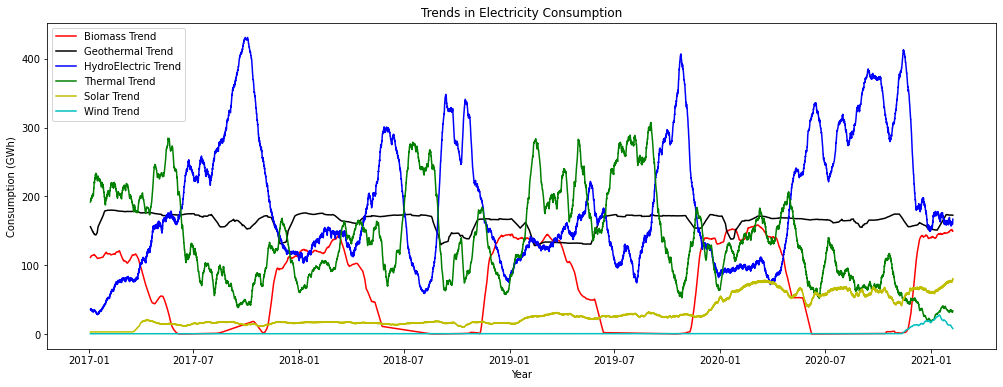

In [48]:
data_columns = ['Biomass', 'Geothermal', 'HydroElectric', 'Thermal', 'Solar', 'Wind']
data_365d_rol = df[data_columns].rolling(window = 365, center = True).mean()

fig, ax = plt.subplots(figsize = (17,6))

ax.plot(data_365d_rol['Biomass'], 'r-', label='Biomass Trend')
ax.plot(data_365d_rol['Geothermal'], 'k-', label='Geothermal Trend')
ax.plot(data_365d_rol['HydroElectric'], 'b-', label='HydroElectric Trend')
ax.plot(data_365d_rol['Thermal'], 'g-', label='Thermal Trend')
ax.plot(data_365d_rol['Solar'], 'y-', label='Solar Trend')
ax.plot(data_365d_rol['Wind'], 'c-', label='Wind Trend')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

## <span style="color:cyan">Detrending</span>

In [20]:
# pip install statsmodels
from statsmodels.tsa.stattools import adfuller

Text(0.5, 1.0, 'Trends in Electricity Consumption')

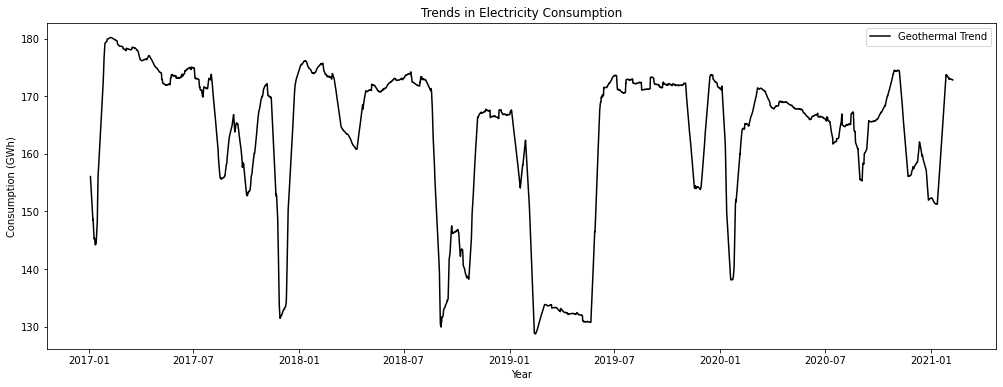

In [49]:
data_columns = ['Biomass', 'Geothermal', 'HydroElectric', 'Thermal', 'Solar', 'Wind']
data_365d_rol = df[data_columns].rolling(window = 365, center = True).mean()

fig, ax = plt.subplots(figsize = (17,6))

# ax.plot(data_365d_rol['Biomass'], 'r-', label='Biomass Trend')
ax.plot(data_365d_rol['Geothermal'], 'k-', label='Geothermal Trend')
# ax.plot(data_365d_rol['HydroElectric'], 'b-', label='HydroElectric Trend')
# ax.plot(data_365d_rol['Thermal'], 'g-', label='Thermal Trend')
# ax.plot(data_365d_rol['Solar'], 'y-', label='Solar Trend')
# ax.plot(data_365d_rol['Wind'], 'c-', label='Wind Trend')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

In [50]:
# detrend by taking derivative
df = df - df.shift(1)
df = df[1:]

Text(0.5, 1.0, 'Trends in Electricity Consumption')

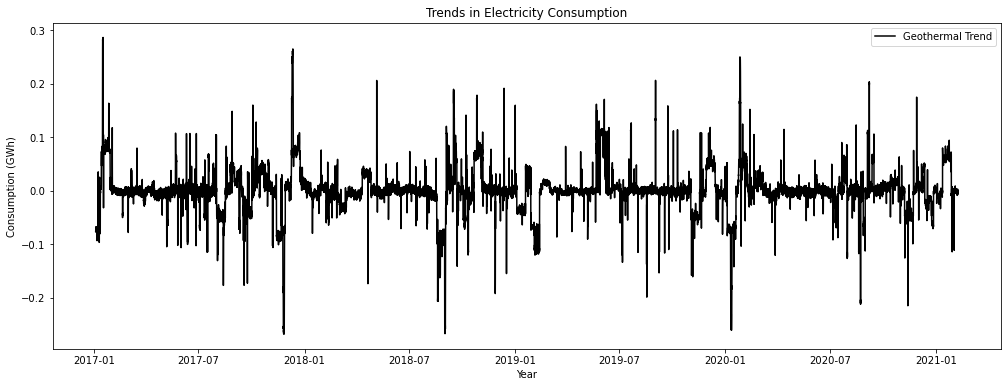

In [51]:
data_columns = ['Biomass', 'Geothermal', 'HydroElectric', 'Thermal', 'Solar', 'Wind']
data_365d_rol = df[data_columns].rolling(window = 365, center = True).mean()

fig, ax = plt.subplots(figsize = (17,6))

# ax.plot(data_365d_rol['Biomass'], 'r-', label='Biomass Trend')
ax.plot(data_365d_rol['Geothermal'], 'k-', label='Geothermal Trend')
# ax.plot(data_365d_rol['HydroElectric'], 'b-', label='HydroElectric Trend')
# ax.plot(data_365d_rol['Thermal'], 'g-', label='Thermal Trend')
# ax.plot(data_365d_rol['Solar'], 'y-', label='Solar Trend')
# ax.plot(data_365d_rol['Wind'], 'c-', label='Wind Trend')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

Coefficients: [-1.19347757e-13  4.06581731e-09 -3.09857704e-05  4.24423666e-02
  1.22723875e+02]


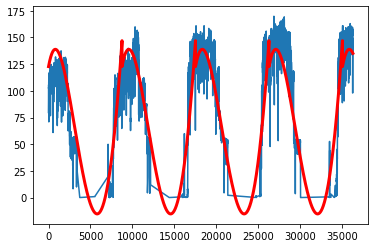

In [63]:
series = df['Biomass']
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%8760 for i in range(0, len(series))]
y = series.values
degree = 4
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

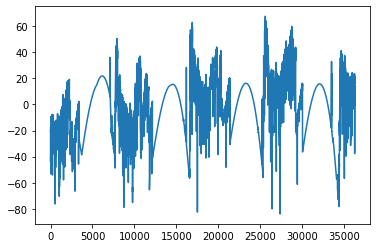

In [61]:
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
plt.plot(diff)
plt.show()

Text(0.5, 1.0, 'Trends in Electricity Consumption')

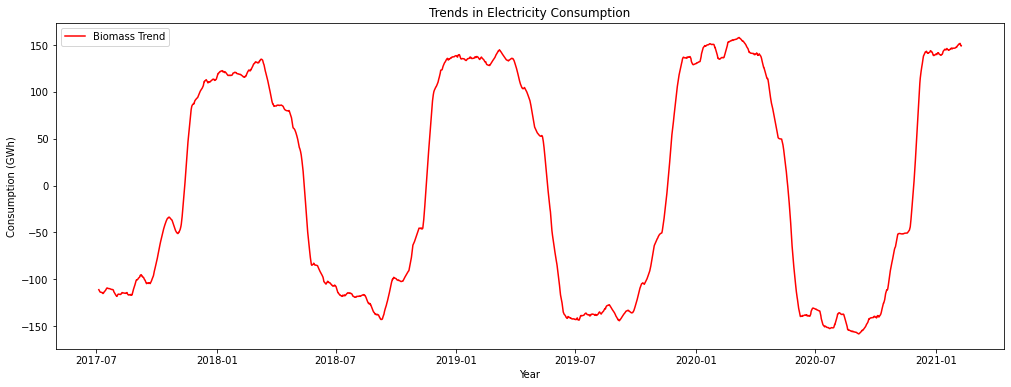

In [54]:
data_columns = ['Biomass', 'Geothermal', 'HydroElectric', 'Thermal', 'Solar', 'Wind']
data_365d_rol = df[data_columns].rolling(window = 365, center = True).mean()

fig, ax = plt.subplots(figsize = (17,6))

ax.plot(data_365d_rol['Biomass'], 'r-', label='Biomass Trend')
# ax.plot(data_365d_rol['Geothermal'], 'k-', label='Geothermal Trend')
# ax.plot(data_365d_rol['HydroElectric'], 'b-', label='HydroElectric Trend')
# ax.plot(data_365d_rol['Thermal'], 'g-', label='Thermal Trend')
# ax.plot(data_365d_rol['Solar'], 'y-', label='Solar Trend')
# ax.plot(data_365d_rol['Wind'], 'c-', label='Wind Trend')

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

## <span style="color:cyan">Modeling</span>